In [13]:
from Wind.Private.DBConfig import mongoconnection
from pymongo import MongoClient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [14]:
client = MongoClient(mongoconnection.server)
db = client[mongoconnection.db]
db.authenticate(mongoconnection.user, password=mongoconnection.passwd)
col = db[mongoconnection.col]


In [16]:
colors = {'regdir':'b', 'seq2seq':'r', 'mlps2s': 'g', 'convo': 'c'}

def find_exp(query):
    return col.find(query)

def count_exp(query):
    print col.count(query)
    
    
def compare_exp(lexp, n=10):
    
    fig = plt.figure(figsize=(16, 10), dpi=100)

    axes = fig.add_subplot(1, 2, 1)

    ldiff = {'regdir':[], 'seq2seq':[], 'mlps2s':[],'convo':[]}
    
    for exp in lexp:
        data = np.array(exp['result'])
        ldiff[exp['arch']['mode']].append((np.sum(data[:,1]), exp))
        axes.plot(data[:,0], data[:,1],colors[exp['arch']['mode']])

    
    besta = {}
    for type in ldiff:
        besta[type] = [b[1] for b in sorted(ldiff[type], reverse=True)[:n]]


        for exp in besta[type]:
            axes = fig.add_subplot(1, 2, 2)
            data = np.array(exp['result'])
            axes.plot(data[:,0], data[:,1], colors[exp['arch']['mode']])
            axes.plot(data[:,0], data[:,3], colors[exp['arch']['mode']]+'--')
            
    return besta

    

In [17]:
query1= {'status':'done', 
         #'arch.mode':'seq2seq',
             #   'data.lag':32, 
             # 'data.dataset':3, 
               # 'data.vars': [0,1,2,3],
              #  'arch.neurons': 32, 
               # 'arch.drop':0.1,
              #  'arch.rnn':'GRU',
               # 'arch.bidirectional':False,
               # 'arch.activation':'tanh'
               }

In [18]:
count_exp(query1)

5411


In [19]:
res1= find_exp(query1)

#print res1['arch']

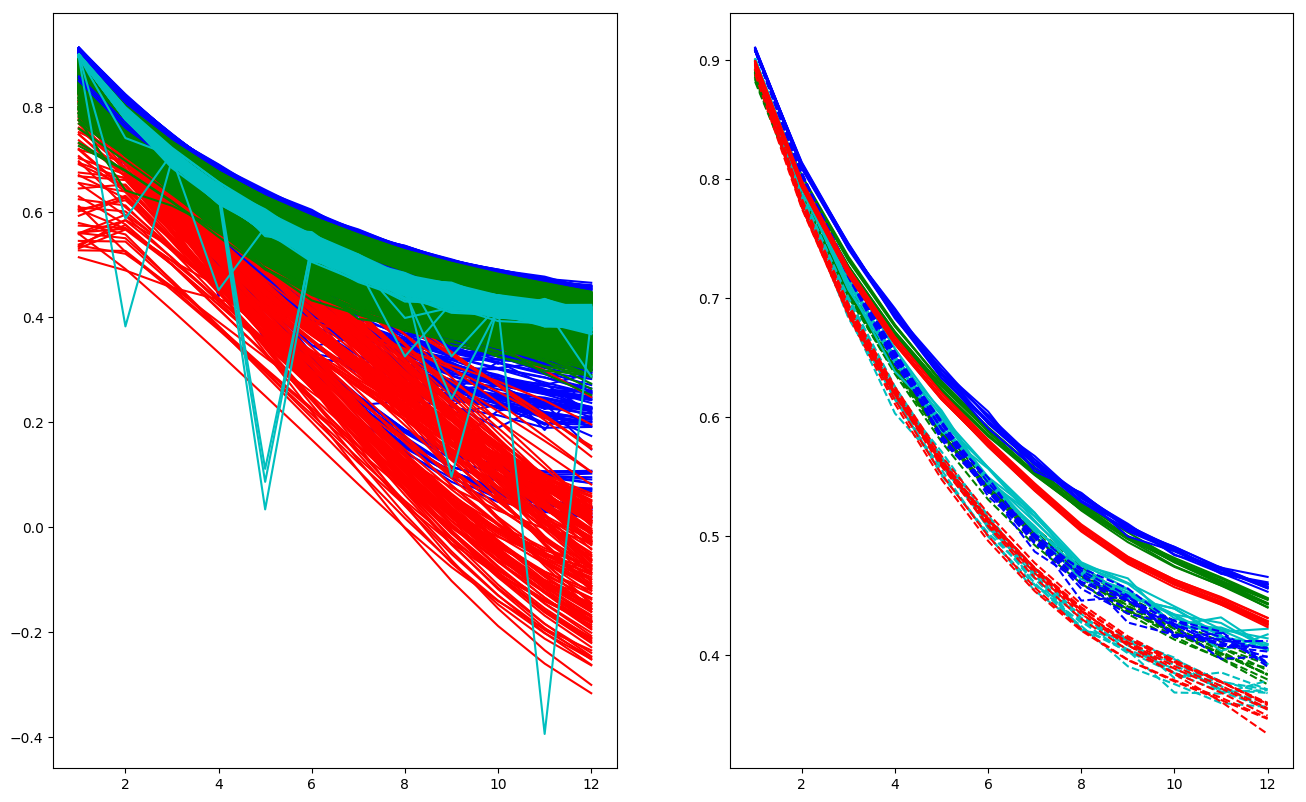

In [20]:
best = compare_exp(res1)

In [21]:
i=0
type = 'mlps2s'

print('ID:', best[type][i]['_id'])
print('DS:', best[type][i]['data']['dataset'])
print('LAG:', best[type][i]['data']['lag'])
print('VARS:', best[type][i]['data']['vars'])
print('RNN:', best[type][i]['arch']['rnn'] if 'rnn' in best[type][i]['arch'] else '')
print('NLY:', best[type][i]['arch']['nlayers'])
print('NLYE:', best[type][i]['arch']['nlayersE'] if 'nlayersE' in best[type][i]['arch'] else '')
print('NLYD', best[type][i]['arch']['nlayersD'] if 'nlayersD' in best[type][i]['arch'] else '') 
print('NNEUR:', best[type][i]['arch']['neurons'] if 'neurons' in best[type][i]['arch'] else '')
print('NNEURD:', 0 if not 'neuronsD' in  best[type][i]['arch'] else best[type][i]['arch']['neuronsD'])
print('DROP:', best[type][i]['arch']['drop'])
print('BI:',best[type][i]['arch']['bidirectional'] if 'bidirectional' in best[type][i]['arch'] else '')
print('FILT:', best[type][i]['arch']['filters'] if 'filters' in best[type][i]['arch'] else '')
print('STRD:', best[type][i]['arch']['strides'] if 'strides' in best[type][i]['arch'] else '')
print('KERSIZ:', best[type][i]['arch']['kernel_size'] if 'kernel_size' in best[type][i]['arch'] else '')    
print('ACT:', best[type][i]['arch']['activation'])
print('MODE:', best[type][i]['arch']['mode'])
print('OPT:', best[type][i]['training']['optimizer'])
print('FULLLY:', best[type][i]['arch']['full'])

print(np.array(best[type][i]['result'])[:,1])

('ID:', u'1523368665')
('DS:', 3)
('LAG:', 18)
('VARS:', [0, 1, 2, 3, 4, 5])
('RNN:', u'GRU')
('NLY:', 2)
('NLYE:', 1)
('NLYD', 1)
('NNEUR:', 8)
('NNEURD:', 8)
('DROP:', 0.1)
('BI:', False)
('FILT:', '')
('STRD:', '')
('KERSIZ:', '')
('ACT:', u'sigmoid')
('MODE:', u'mlps2s')
('OPT:', u'adamax')
('FULLLY:', [256, 128])
[0.8908054  0.79913623 0.73131193 0.67588269 0.6302419  0.59136796
 0.55675231 0.52723143 0.50304656 0.48021513 0.4622595  0.44733937]


In [22]:
i=0
for type in best:
    print(type, np.array(best[type][i]['result'])[:,1])  

('mlps2s', array([0.8908054 , 0.79913623, 0.73131193, 0.67588269, 0.6302419 ,
       0.59136796, 0.55675231, 0.52723143, 0.50304656, 0.48021513,
       0.4622595 , 0.44733937]))
('convo', array([0.89823381, 0.79280691, 0.71477543, 0.6507843 , 0.60116633,
       0.55752343, 0.51642419, 0.47579219, 0.46441122, 0.42361909,
       0.42312017, 0.40932576]))
('regdir', array([0.90769386, 0.81398563, 0.74528206, 0.684751  , 0.63929894,
       0.60113819, 0.56214923, 0.53505827, 0.50872348, 0.48454918,
       0.46870792, 0.45930467]))
('seq2seq', array([0.89787923, 0.79823203, 0.72437538, 0.66713222, 0.62014338,
       0.58090355, 0.54418795, 0.50974762, 0.48261613, 0.46319924,
       0.44873676, 0.43128099]))
